In [481]:
from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/My Drive/IDM Colab Notebooks/Weather dataset'
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/IDM Colab Notebooks/Weather dataset
'the weather of 187 countries in 2020.csv'


# Import necessary libraries

In [482]:
import pandas as pd
import geopandas as gpd
from geopy.exc import GeocoderTimedOut
from geopy.geocoders import Nominatim
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV

# Load the dataset

In [483]:
df = pd.read_csv('the weather of 187 countries in 2020.csv')
df

<ipython-input-483-f034fd878c8b>:1: DtypeWarning: Columns (16,17,18,19,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('the weather of 187 countries in 2020.csv')


,STATION,Country/Region,DATE,Year,Month,Day,PRCP,SNWD,TAVG,TMAX,...,LONGITUDE,ELEVATION,PRCP_ATTRIBUTES,TAVG_ATTRIBUTES,TMAX_ATTRIBUTES,TMIN_ATTRIBUTES,DAPR,MDPR,WESD,SNWD_ATTRIBUTES
0,TZ000063894,Comoros,2020-01-22,2020,1,22,10.9,NaN,27.6,30.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TZ000063894,Comoros,2020-01-23,2020,1,23,0.0,NaN,26.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TZ000063894,Comoros,2020-01-24,2020,1,24,9.4,NaN,27.9,30.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TZ000063894,Comoros,2020-01-25,2020,1,25,0.3,NaN,27.9,30.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TZ000063894,Comoros,2020-01-26,2020,1,26,0.0,NaN,28.2,31.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1392570,COM00080091,Colombia,2020-07-23,2020,7,23,0.0,NaN,28.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1392571,COM00080091,Colombia,2020-07-24,2020,7,24,NaN,NaN,27.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1392572,COM00080091,Colombia,2020-07-25,2020,7,25,NaN,NaN,26.8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1392573,COM00080091,Colombia,2020-07-26,2020,7,26,NaN,NaN,28.8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [484]:
df.columns

Index(['STATION', 'Country/Region', 'DATE', 'Year', 'Month', 'Day', 'PRCP',
       'SNWD', 'TAVG', 'TMAX', 'TMIN', 'SNOW', 'LATITUDE', 'LONGITUDE',
       'ELEVATION', 'PRCP_ATTRIBUTES', 'TAVG_ATTRIBUTES', 'TMAX_ATTRIBUTES',
       'TMIN_ATTRIBUTES', 'DAPR', 'MDPR', 'WESD', 'SNWD_ATTRIBUTES'],
      dtype='object')

In [485]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1392575 entries, 0 to 1392574
Data columns (total 23 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   STATION          1392575 non-null  object 
 1   Country/Region   1392575 non-null  object 
 2   DATE             1392575 non-null  object 
 3   Year             1392575 non-null  int64  
 4   Month            1392575 non-null  int64  
 5   Day              1392575 non-null  int64  
 6   PRCP             1043369 non-null  float64
 7   SNWD             377429 non-null   float64
 8   TAVG             878632 non-null   float64
 9   TMAX             866705 non-null   float64
 10  TMIN             898381 non-null   float64
 11  SNOW             105392 non-null   float64
 12  LATITUDE         104742 non-null   float64
 13  LONGITUDE        104742 non-null   float64
 14  ELEVATION        104742 non-null   float64
 15  PRCP_ATTRIBUTES  6007 non-null     object 
 16  TAVG_ATTRIBUTES  3

In [486]:
df.describe()

,Year,Month,Day,PRCP,SNWD,TAVG,TMAX,TMIN,SNOW,LATITUDE,LONGITUDE,ELEVATION,DAPR,MDPR,WESD
count,1392575.0,1.392575e+06,1.392575e+06,1.043369e+06,377429.000000,878632.000000,866705.000000,898381.000000,105392.000000,104742.000000,104742.000000,104742.000000,1293.000000,81.000000,2.000000
mean,2020.0,4.279517e+00,1.595168e+01,2.564688e+00,120.712848,14.814992,17.412551,7.093554,3.742760,37.689351,71.371220,787.542437,5.292343,0.958025,0.050000
std,0.0,1.812637e+00,8.770296e+00,8.035237e+00,293.874318,13.063075,12.707588,12.227766,19.093372,11.572761,71.760255,1094.757321,7.121322,1.653137,0.070711
min,2020.0,1.000000e+00,1.000000e+00,0.000000e+00,-20.000000,-56.200000,-55.000000,-65.000000,0.000000,-17.817000,-140.850000,0.600000,1.000000,0.000000,0.000000
25%,2020.0,3.000000e+00,8.000000e+00,0.000000e+00,0.000000,6.700000,8.400000,0.000000,0.000000,30.667000,75.983000,68.000000,2.000000,0.000000,0.025000
50%,2020.0,4.000000e+00,1.600000e+01,0.000000e+00,0.000000,16.800000,18.500000,7.700000,0.000000,37.850000,104.500000,250.000000,3.000000,0.280000,0.050000
75%,2020.0,6.000000e+00,2.400000e+01,1.500000e+00,99.000000,25.600000,27.222222,15.600000,0.000000,45.217000,116.117000,1099.000000,5.000000,1.510000,0.075000
max,2020.0,7.000000e+00,3.100000e+01,4.849000e+02,52900.000000,43.300000,51.200000,36.700000,625.000000,82.500000,131.983000,4701.000000,61.000000,9.240000,0.100000


#Seeing null values of dataset.

In [487]:
df.isnull().sum()

STATION                  0
Country/Region           0
DATE                     0
Year                     0
Month                    0
Day                      0
PRCP                349206
SNWD               1015146
TAVG                513943
TMAX                525870
TMIN                494194
SNOW               1287183
LATITUDE           1287833
LONGITUDE          1287833
ELEVATION          1287833
PRCP_ATTRIBUTES    1386568
TAVG_ATTRIBUTES    1388725
TMAX_ATTRIBUTES    1386938
TMIN_ATTRIBUTES    1386701
DAPR               1391282
MDPR               1392494
WESD               1392573
SNWD_ATTRIBUTES    1392221
dtype: int64

#Removing unnecessary columns from the dataset.

In [488]:
new_df = df.copy()

In [489]:
new_df

,STATION,Country/Region,DATE,Year,Month,Day,PRCP,SNWD,TAVG,TMAX,...,LONGITUDE,ELEVATION,PRCP_ATTRIBUTES,TAVG_ATTRIBUTES,TMAX_ATTRIBUTES,TMIN_ATTRIBUTES,DAPR,MDPR,WESD,SNWD_ATTRIBUTES
0,TZ000063894,Comoros,2020-01-22,2020,1,22,10.9,NaN,27.6,30.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TZ000063894,Comoros,2020-01-23,2020,1,23,0.0,NaN,26.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TZ000063894,Comoros,2020-01-24,2020,1,24,9.4,NaN,27.9,30.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TZ000063894,Comoros,2020-01-25,2020,1,25,0.3,NaN,27.9,30.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TZ000063894,Comoros,2020-01-26,2020,1,26,0.0,NaN,28.2,31.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1392570,COM00080091,Colombia,2020-07-23,2020,7,23,0.0,NaN,28.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1392571,COM00080091,Colombia,2020-07-24,2020,7,24,NaN,NaN,27.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1392572,COM00080091,Colombia,2020-07-25,2020,7,25,NaN,NaN,26.8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1392573,COM00080091,Colombia,2020-07-26,2020,7,26,NaN,NaN,28.8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [490]:
new_df = new_df.drop(['DATE','Year','SNWD','PRCP_ATTRIBUTES',	'TAVG_ATTRIBUTES','SNOW',	'TMAX_ATTRIBUTES','ELEVATION',	'TMIN_ATTRIBUTES',	'DAPR',	'MDPR',	'WESD',	'SNWD_ATTRIBUTES'], axis=1)

In [491]:
new_df.dropna(subset=['TAVG'], inplace=True)

In [492]:
new_df.head()

,STATION,Country/Region,Month,Day,PRCP,TAVG,TMAX,TMIN,LATITUDE,LONGITUDE
0,TZ000063894,Comoros,1,22,10.9,27.6,30.2,24.9,NaN,NaN
1,TZ000063894,Comoros,1,23,0.0,26.7,NaN,NaN,NaN,NaN
2,TZ000063894,Comoros,1,24,9.4,27.9,30.6,25.6,NaN,NaN
3,TZ000063894,Comoros,1,25,0.3,27.9,30.2,16.3,NaN,NaN
4,TZ000063894,Comoros,1,26,0.0,28.2,31.5,NaN,NaN,NaN


#Selecting 4 countries with similar geolocation features.

#Selecting Nepal and missing data imputed with values to maintain data integrity and completeness.

In [493]:
new4_df = new_df.copy()

In [494]:
new4_df.head()

,STATION,Country/Region,Month,Day,PRCP,TAVG,TMAX,TMIN,LATITUDE,LONGITUDE
0,TZ000063894,Comoros,1,22,10.9,27.6,30.2,24.9,NaN,NaN
1,TZ000063894,Comoros,1,23,0.0,26.7,NaN,NaN,NaN,NaN
2,TZ000063894,Comoros,1,24,9.4,27.9,30.6,25.6,NaN,NaN
3,TZ000063894,Comoros,1,25,0.3,27.9,30.2,16.3,NaN,NaN
4,TZ000063894,Comoros,1,26,0.0,28.2,31.5,NaN,NaN,NaN


In [495]:
new4_df_Nepal=new4_df[new4_df['Country/Region'] == 'Nepal'].copy()

In [496]:
new4_df_Nepal

,STATION,Country/Region,Month,Day,PRCP,TAVG,TMAX,TMIN,LATITUDE,LONGITUDE
2815,NP000444540,Nepal,1,22,0.0,9.2,19.0,1.6,NaN,NaN
2816,NP000444540,Nepal,1,23,0.0,9.1,18.5,1.5,NaN,NaN
2817,NP000444540,Nepal,1,24,0.0,8.1,15.7,2.8,NaN,NaN
2818,NP000444540,Nepal,1,25,0.0,9.2,NaN,2.5,NaN,NaN
2819,NP000444540,Nepal,1,26,0.0,8.8,16.4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
3106,NPM00044477,Nepal,5,22,9.9,21.2,NaN,18.8,NaN,NaN
3107,NPM00044477,Nepal,5,24,0.0,23.0,27.0,19.6,NaN,NaN
3108,NPM00044477,Nepal,5,25,0.0,25.8,29.1,19.9,NaN,NaN
3109,NPM00044477,Nepal,5,26,0.0,24.4,31.0,18.7,NaN,NaN


In [497]:
new4_df_Nepal.isnull().sum()

STATION             0
Country/Region      0
Month               0
Day                 0
PRCP               66
TAVG                0
TMAX               93
TMIN              115
LATITUDE          296
LONGITUDE         296
dtype: int64

In [498]:
geolocator = Nominatim(user_agent="your_app_name")
new4_df_Nepal['LATITUDE']=geolocator.geocode('Nepal').latitude
new4_df_Nepal['LONGITUDE']=geolocator.geocode('Nepal').longitude

In [499]:
TMAX_mean_value = new4_df_Nepal['TMAX'].mean()
print(TMAX_mean_value)
TMAX_median_value = new4_df_Nepal['TMAX'].median()
print(TMAX_median_value)
TMAX_mode_value = new4_df_Nepal['TMAX'].mode()
print(TMAX_mode_value)

24.287684729064036
25.0
0    26.0
1    28.0
Name: TMAX, dtype: float64


In [500]:
new4_df_Nepal['TMAX'].fillna(np.random.choice(np.array([24.3,25.0,26.0,28.0])), inplace=True)

In [501]:
TMIN_mean_value = new4_df_Nepal['TMIN'].mean()
print(TMIN_mean_value)
TMIN_median_value = new4_df_Nepal['TMIN'].median()
print(TMIN_median_value)
TMIN_mode_value = new4_df_Nepal['TMIN'].mode()
print(TMIN_mode_value)

11.675690607734808
11.5
0    11.5
Name: TMIN, dtype: float64


In [502]:
new4_df_Nepal['TMIN'].fillna(np.random.choice(np.array([11.68,11.5])), inplace=True)

In [503]:
new4_df_Nepal

,STATION,Country/Region,Month,Day,PRCP,TAVG,TMAX,TMIN,LATITUDE,LONGITUDE
2815,NP000444540,Nepal,1,22,0.0,9.2,19.0,1.6,28.108393,84.091714
2816,NP000444540,Nepal,1,23,0.0,9.1,18.5,1.5,28.108393,84.091714
2817,NP000444540,Nepal,1,24,0.0,8.1,15.7,2.8,28.108393,84.091714
2818,NP000444540,Nepal,1,25,0.0,9.2,28.0,2.5,28.108393,84.091714
2819,NP000444540,Nepal,1,26,0.0,8.8,16.4,11.5,28.108393,84.091714
...,...,...,...,...,...,...,...,...,...,...
3106,NPM00044477,Nepal,5,22,9.9,21.2,28.0,18.8,28.108393,84.091714
3107,NPM00044477,Nepal,5,24,0.0,23.0,27.0,19.6,28.108393,84.091714
3108,NPM00044477,Nepal,5,25,0.0,25.8,29.1,19.9,28.108393,84.091714
3109,NPM00044477,Nepal,5,26,0.0,24.4,31.0,18.7,28.108393,84.091714


In [504]:
new4_df_Nepal.isnull().sum()

STATION            0
Country/Region     0
Month              0
Day                0
PRCP              66
TAVG               0
TMAX               0
TMIN               0
LATITUDE           0
LONGITUDE          0
dtype: int64

#Selecting India and missing data imputed with values to maintain data integrity and completeness.

In [505]:
new4_df_India=new4_df[new4_df['Country/Region'] == 'India'].copy()

In [506]:
new4_df_India

,STATION,Country/Region,Month,Day,PRCP,TAVG,TMAX,TMIN,LATITUDE,LONGITUDE
589897,IN017111200,India,1,22,NaN,22.5,NaN,16.1,NaN,NaN
589898,IN017111200,India,1,23,NaN,24.1,NaN,18.5,NaN,NaN
589899,IN017111200,India,1,24,NaN,23.2,NaN,NaN,NaN,NaN
589900,IN017111200,India,1,25,NaN,21.4,NaN,NaN,NaN,NaN
589901,IN017111200,India,1,26,NaN,21.3,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
612899,IN004102500,India,7,23,6.1,28.3,NaN,24.8,NaN,NaN
612900,IN004102500,India,7,24,0.0,25.7,NaN,NaN,NaN,NaN
612901,IN004102500,India,7,25,72.9,28.9,NaN,NaN,NaN,NaN
612902,IN004102500,India,7,26,0.0,31.3,35.8,27.6,NaN,NaN


In [507]:
new4_df_India.isnull().sum()

STATION               0
Country/Region        0
Month                 0
Day                   0
PRCP              15145
TAVG                  0
TMAX              13111
TMIN               4037
LATITUDE          23007
LONGITUDE         23007
dtype: int64

In [508]:
geolocator = Nominatim(user_agent="your_app_name")
new4_df_India['LATITUDE']=geolocator.geocode('India').latitude
new4_df_India['LONGITUDE']=geolocator.geocode('India').longitude

In [509]:
TMAX_mean_value = new4_df_India['TMAX'].mean()
print(TMAX_mean_value)
TMAX_median_value = new4_df_India['TMAX'].median()
print(TMAX_median_value)
TMAX_mode_value = new4_df_India['TMAX'].mode()
print(TMAX_mode_value)

33.087368633791435
33.7
0    35.0
Name: TMAX, dtype: float64


In [510]:
new4_df_India['TMAX'].fillna(np.random.choice(np.array([33.08,33.7,35.0])), inplace=True)

In [511]:
TMIN_mean_value = new4_df_India['TMIN'].mean()
print(TMIN_mean_value)
TMIN_median_value = new4_df_India['TMIN'].median()
print(TMIN_median_value)
TMIN_mode_value = new4_df_India['TMIN'].mode()
print(TMIN_mode_value)

20.950817079599368
22.5
0    25.0
Name: TMIN, dtype: float64


In [512]:
new4_df_India['TMIN'].fillna(np.random.choice(np.array([20.95,22.5,25.0])), inplace=True)

In [513]:
new4_df_India.isnull().sum()

STATION               0
Country/Region        0
Month                 0
Day                   0
PRCP              15145
TAVG                  0
TMAX                  0
TMIN                  0
LATITUDE              0
LONGITUDE             0
dtype: int64

In [514]:
new4_df_India

,STATION,Country/Region,Month,Day,PRCP,TAVG,TMAX,TMIN,LATITUDE,LONGITUDE
589897,IN017111200,India,1,22,NaN,22.5,33.08,16.10,22.351115,78.667743
589898,IN017111200,India,1,23,NaN,24.1,33.08,18.50,22.351115,78.667743
589899,IN017111200,India,1,24,NaN,23.2,33.08,20.95,22.351115,78.667743
589900,IN017111200,India,1,25,NaN,21.4,33.08,20.95,22.351115,78.667743
589901,IN017111200,India,1,26,NaN,21.3,33.08,20.95,22.351115,78.667743
...,...,...,...,...,...,...,...,...,...,...
612899,IN004102500,India,7,23,6.1,28.3,33.08,24.80,22.351115,78.667743
612900,IN004102500,India,7,24,0.0,25.7,33.08,20.95,22.351115,78.667743
612901,IN004102500,India,7,25,72.9,28.9,33.08,20.95,22.351115,78.667743
612902,IN004102500,India,7,26,0.0,31.3,35.80,27.60,22.351115,78.667743


#Selecting Pakistan and missing data imputed with values to maintain data integrity and completeness.

In [515]:
new4_df_Pakistan=new4_df[new4_df['Country/Region'] == 'Pakistan'].copy()

In [516]:
new4_df_Pakistan

,STATION,Country/Region,Month,Day,PRCP,TAVG,TMAX,TMIN,LATITUDE,LONGITUDE
254100,PKM00041718,Pakistan,1,22,0.0,12.9,NaN,NaN,NaN,NaN
254101,PKM00041718,Pakistan,1,23,0.0,13.1,NaN,NaN,NaN,NaN
254102,PKM00041718,Pakistan,1,24,0.0,14.0,NaN,NaN,NaN,NaN
254103,PKM00041718,Pakistan,1,25,0.0,16.4,NaN,NaN,NaN,NaN
254104,PKM00041718,Pakistan,1,26,0.0,15.4,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
258708,PKM00041759,Pakistan,7,23,NaN,32.1,NaN,NaN,NaN,NaN
258709,PKM00041759,Pakistan,7,24,NaN,32.2,NaN,NaN,NaN,NaN
258710,PKM00041759,Pakistan,7,25,NaN,32.3,NaN,NaN,NaN,NaN
258711,PKM00041759,Pakistan,7,26,20.1,31.4,NaN,NaN,NaN,NaN


In [517]:
new4_df_Pakistan.isnull().sum()

STATION              0
Country/Region       0
Month                0
Day                  0
PRCP              1944
TAVG                 0
TMAX              4422
TMIN              4403
LATITUDE          4613
LONGITUDE         4613
dtype: int64

In [518]:
geolocator = Nominatim(user_agent="your_app_name")
new4_df_Pakistan['LATITUDE']=geolocator.geocode('Pakistan').latitude
new4_df_Pakistan['LONGITUDE']=geolocator.geocode('Pakistan').longitude

In [519]:
TMAX_mean_value = new4_df_Pakistan['TMAX'].mean()
print(TMAX_mean_value)
TMAX_median_value = new4_df_Pakistan['TMAX'].median()
print(TMAX_median_value)
TMAX_mode_value = new4_df_Pakistan['TMAX'].mode()
print(TMAX_mode_value)

35.65130890052356
37.0
0    39.5
Name: TMAX, dtype: float64


In [520]:
new4_df_Pakistan['TMAX'].fillna(np.random.choice(np.array([35.65,37.0,39.5])), inplace=True)

In [521]:
TMIN_mean_value = new4_df_Pakistan['TMIN'].mean()
print(TMIN_mean_value)
TMIN_median_value = new4_df_Pakistan['TMIN'].median()
print(TMIN_median_value)
TMIN_mode_value = new4_df_Pakistan['TMIN'].mode()
print(TMIN_mode_value)

19.02857142857143
21.5
0    16.0
1    28.5
Name: TMIN, dtype: float64


In [522]:
new4_df_Pakistan['TMIN'].fillna(np.random.choice(np.array([19.02,21.5,16.0,28.5])), inplace=True)

In [523]:
new4_df_Pakistan.isnull().sum()

STATION              0
Country/Region       0
Month                0
Day                  0
PRCP              1944
TAVG                 0
TMAX                 0
TMIN                 0
LATITUDE             0
LONGITUDE            0
dtype: int64

#Selecting China and missing data imputed with values to maintain data integrity and completeness.

In [524]:
new4_df_China=new4_df[new4_df['Country/Region'] == 'China'].copy()

In [525]:
new4_df_China

,STATION,Country/Region,Month,Day,PRCP,TAVG,TMAX,TMIN,LATITUDE,LONGITUDE
65576,CHM00059082,China,1,22,0.0,18.9,24.5,11.9,24.667,113.600
65577,CHM00059082,China,1,23,0.0,20.7,26.1,13.9,24.667,113.600
65578,CHM00059082,China,1,24,5.6,14.7,26.1,10.2,24.667,113.600
65579,CHM00059082,China,1,25,24.4,9.4,19.4,6.9,24.667,113.600
65580,CHM00059082,China,1,26,11.2,7.4,11.5,6.6,24.667,113.600
...,...,...,...,...,...,...,...,...,...,...
104520,CHM00056079,China,7,23,23.6,14.2,20.7,6.9,33.583,102.967
104521,CHM00056079,China,7,24,30.2,13.7,20.5,11.3,33.583,102.967
104522,CHM00056079,China,7,25,3.3,10.2,20.5,4.0,33.583,102.967
104523,CHM00056079,China,7,26,0.0,10.3,18.8,3.6,33.583,102.967


In [526]:
geolocator = Nominatim(user_agent="your_app_name")
new4_df_China['LATITUDE']=geolocator.geocode('China').latitude
new4_df_China['LONGITUDE']=geolocator.geocode('China').longitude

In [527]:
TMAX_mean_value = new4_df_China['TMAX'].mean()
print(TMAX_mean_value)
TMAX_median_value = new4_df_China['TMAX'].median()
print(TMAX_median_value)
TMAX_mode_value = new4_df_China['TMAX'].mode()
print(TMAX_mode_value)

20.10291129186865
22.0
0    31.5
Name: TMAX, dtype: float64


In [528]:
new4_df_China['TMAX'].fillna(np.random.choice(np.array([20.1,22.0,31.5])), inplace=True)

In [529]:
TMIN_mean_value = new4_df_China['TMIN'].mean()
print(TMIN_mean_value)
TMIN_median_value = new4_df_China['TMIN'].median()
print(TMIN_median_value)
TMIN_mode_value = new4_df_China['TMIN'].mode()
print(TMIN_mode_value)

6.548543502202643
8.3
0    12.0
1    15.5
Name: TMIN, dtype: float64


In [530]:
new4_df_China['TMIN'].fillna(np.random.choice(np.array([6.54,8.3,12.0,15.5])), inplace=True)

In [531]:
new4_df_China.isnull().sum()

STATION              0
Country/Region       0
Month                0
Day                  0
PRCP              1492
TAVG                 0
TMAX                 0
TMIN                 0
LATITUDE             0
LONGITUDE            0
dtype: int64

#Concatenating all 4 countries in one dataset.

In [532]:
merged_df = pd.concat([new4_df_Nepal, new4_df_India, new4_df_Pakistan, new4_df_China], axis=0)

In [533]:
merged_df

,STATION,Country/Region,Month,Day,PRCP,TAVG,TMAX,TMIN,LATITUDE,LONGITUDE
2815,NP000444540,Nepal,1,22,0.0,9.2,19.0,1.6,28.108393,84.091714
2816,NP000444540,Nepal,1,23,0.0,9.1,18.5,1.5,28.108393,84.091714
2817,NP000444540,Nepal,1,24,0.0,8.1,15.7,2.8,28.108393,84.091714
2818,NP000444540,Nepal,1,25,0.0,9.2,28.0,2.5,28.108393,84.091714
2819,NP000444540,Nepal,1,26,0.0,8.8,16.4,11.5,28.108393,84.091714
...,...,...,...,...,...,...,...,...,...,...
104520,CHM00056079,China,7,23,23.6,14.2,20.7,6.9,35.000074,104.999927
104521,CHM00056079,China,7,24,30.2,13.7,20.5,11.3,35.000074,104.999927
104522,CHM00056079,China,7,25,3.3,10.2,20.5,4.0,35.000074,104.999927
104523,CHM00056079,China,7,26,0.0,10.3,18.8,3.6,35.000074,104.999927


In [534]:
merged_df.isnull().sum()

STATION               0
Country/Region        0
Month                 0
Day                   0
PRCP              18647
TAVG                  0
TMAX                  0
TMIN                  0
LATITUDE              0
LONGITUDE             0
dtype: int64

#Missing data imputed in 'PRCP' column with values to maintain data integrity and completeness.

In [535]:
a=merged_df['PRCP'].value_counts()

In [536]:
merged_df['PRCP'].fillna(np.random.choice(np.array(list(set(a.index)))), inplace=True)

In [537]:
merged_df.isnull().sum()

STATION           0
Country/Region    0
Month             0
Day               0
PRCP              0
TAVG              0
TMAX              0
TMIN              0
LATITUDE          0
LONGITUDE         0
dtype: int64

In [538]:
AVG = merged_df['TAVG']
AVG

2815       9.2
2816       9.1
2817       8.1
2818       9.2
2819       8.8
          ... 
104520    14.2
104521    13.7
104522    10.2
104523    10.3
104524    12.7
Name: TAVG, Length: 66865, dtype: float64

In [539]:
merged_df.drop(['TAVG'],axis=1, inplace=True)

In [540]:
merged_df['TAVG'] = AVG
merged_df

,STATION,Country/Region,Month,Day,PRCP,TMAX,TMIN,LATITUDE,LONGITUDE,TAVG
2815,NP000444540,Nepal,1,22,0.0,19.0,1.6,28.108393,84.091714,9.2
2816,NP000444540,Nepal,1,23,0.0,18.5,1.5,28.108393,84.091714,9.1
2817,NP000444540,Nepal,1,24,0.0,15.7,2.8,28.108393,84.091714,8.1
2818,NP000444540,Nepal,1,25,0.0,28.0,2.5,28.108393,84.091714,9.2
2819,NP000444540,Nepal,1,26,0.0,16.4,11.5,28.108393,84.091714,8.8
...,...,...,...,...,...,...,...,...,...,...
104520,CHM00056079,China,7,23,23.6,20.7,6.9,35.000074,104.999927,14.2
104521,CHM00056079,China,7,24,30.2,20.5,11.3,35.000074,104.999927,13.7
104522,CHM00056079,China,7,25,3.3,20.5,4.0,35.000074,104.999927,10.2
104523,CHM00056079,China,7,26,0.0,18.8,3.6,35.000074,104.999927,10.3


#Using Label Encoder to transform the data into numerical values.

In [541]:
label_encoder = LabelEncoder()

In [542]:
merged_df['STATION'] = label_encoder.fit_transform(merged_df['STATION'])

In [543]:
merged_df['Country/Region'] = label_encoder.fit_transform(merged_df['Country/Region'])

In [544]:
merged_df

,STATION,Country/Region,Month,Day,PRCP,TMAX,TMIN,LATITUDE,LONGITUDE,TAVG
2815,343,2,1,22,0.0,19.0,1.6,28.108393,84.091714,9.2
2816,343,2,1,23,0.0,18.5,1.5,28.108393,84.091714,9.1
2817,343,2,1,24,0.0,15.7,2.8,28.108393,84.091714,8.1
2818,343,2,1,25,0.0,28.0,2.5,28.108393,84.091714,9.2
2819,343,2,1,26,0.0,16.4,11.5,28.108393,84.091714,8.8
...,...,...,...,...,...,...,...,...,...,...
104520,119,0,7,23,23.6,20.7,6.9,35.000074,104.999927,14.2
104521,119,0,7,24,30.2,20.5,11.3,35.000074,104.999927,13.7
104522,119,0,7,25,3.3,20.5,4.0,35.000074,104.999927,10.2
104523,119,0,7,26,0.0,18.8,3.6,35.000074,104.999927,10.3


#Correlation Heatmap of the final dataset.

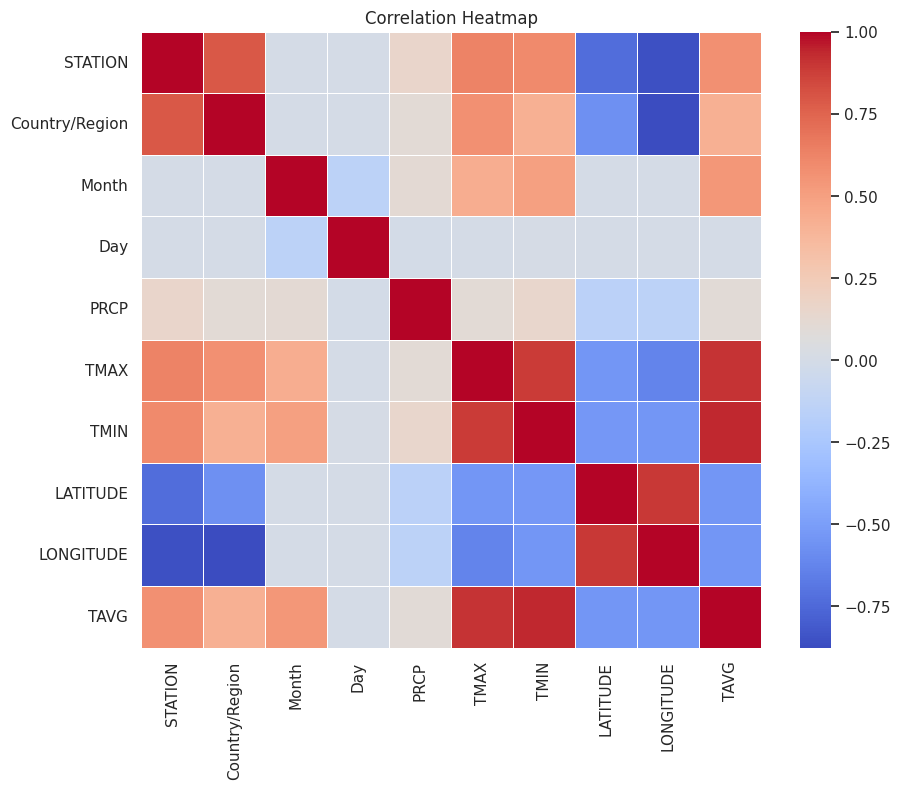

In [545]:
sns.set(font_scale=1.0)
plt.figure(figsize=(10, 8))
sns.heatmap(merged_df.corr(), cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

#Line graph to compare 'TAVG', 'TMAX', 'TMIN' with respect to month.

<Axes: xlabel='Month', ylabel='TAVG'>

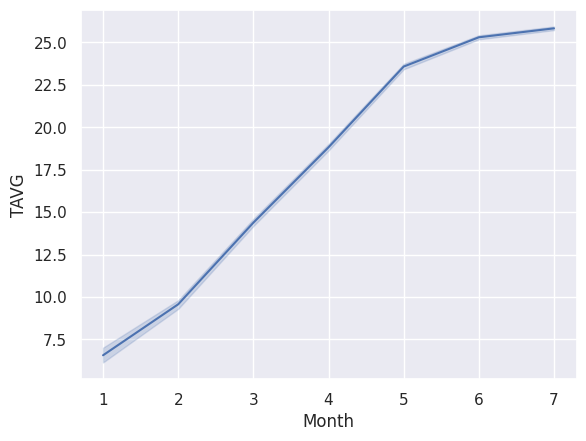

In [546]:
sns.lineplot(x="Month", y="TAVG", data=merged_df)

<Axes: xlabel='Month', ylabel='TMAX'>

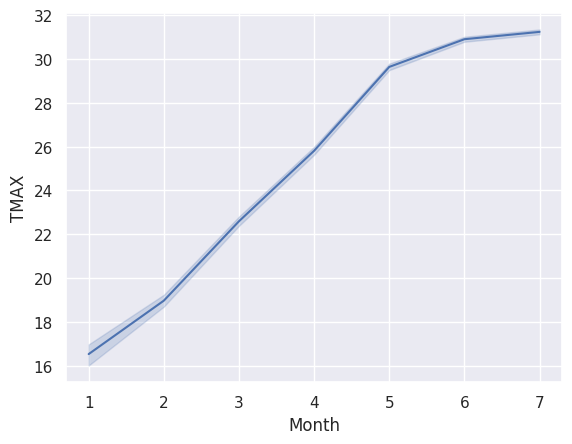

In [547]:
sns.lineplot(x="Month", y="TMAX", data=merged_df)

<Axes: xlabel='Month', ylabel='TMIN'>

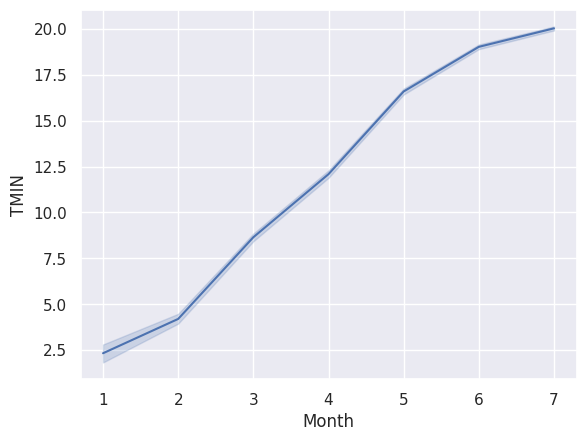

In [548]:
sns.lineplot(x="Month", y="TMIN", data=merged_df)

#Box Plot to compare 'TAVG', 'TMAX', 'TMIN' with respect to month.

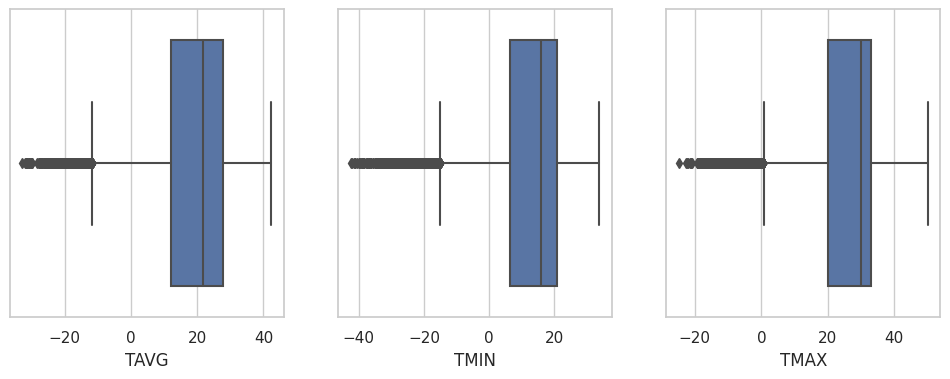

In [577]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

sns.set_theme(style="whitegrid")
for axid, col in enumerate(["TAVG", "TMIN", "TMAX"]):
    sns.boxplot(x=merged_df[col], ax=ax[axid])

#Scatter Plot to visualize 'TAVG' with respect to day.

<Axes: xlabel='Day', ylabel='TAVG'>

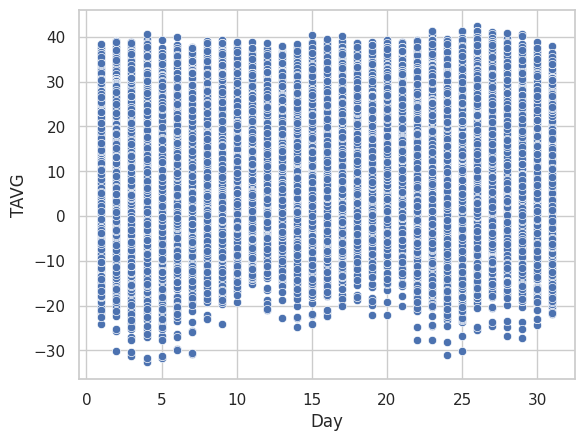

In [550]:
sns.scatterplot(x="Day", y="TAVG", data=merged_df)

**The gap we notice at the bottom of the scatter plot shows the null values that has been imputed.**

#Extracting features into X and y.

In [551]:
X = merged_df.iloc[:, :-1].to_numpy()
y = merged_df.iloc[:, -1].to_numpy()

In [552]:
X

array([[343.       ,   2.       ,   1.       , ...,   1.6      ,
         28.1083929,  84.0917139],
       [343.       ,   2.       ,   1.       , ...,   1.5      ,
         28.1083929,  84.0917139],
       [343.       ,   2.       ,   1.       , ...,   2.8      ,
         28.1083929,  84.0917139],
       ...,
       [119.       ,   0.       ,   7.       , ...,   4.       ,
         35.000074 , 104.999927 ],
       [119.       ,   0.       ,   7.       , ...,   3.6      ,
         35.000074 , 104.999927 ],
       [119.       ,   0.       ,   7.       , ...,   3.5      ,
         35.000074 , 104.999927 ]])

In [553]:
y

array([ 9.2,  9.1,  8.1, ..., 10.2, 10.3, 12.7])

#Splitting dataset to train and test data.

In [554]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [555]:
X_train

array([[131.       ,   0.       ,   3.       , ...,  -3.3      ,
         35.000074 , 104.999927 ],
       [180.       ,   0.       ,   3.       , ...,  10.3      ,
         35.000074 , 104.999927 ],
       [ 85.       ,   0.       ,   4.       , ...,  -5.4      ,
         35.000074 , 104.999927 ],
       ...,
       [ 68.       ,   0.       ,   6.       , ...,   8.1      ,
         35.000074 , 104.999927 ],
       [240.       ,   1.       ,   1.       , ...,  15.8      ,
         22.3511148,  78.6677428],
       [278.       ,   1.       ,   4.       , ...,  24.       ,
         22.3511148,  78.6677428]])

In [556]:
y_train

array([ 4.7, 17.1,  5.1, ..., 19.4, 23.2, 33.6])

In [557]:
X_test

array([[140.       ,   0.       ,   6.       , ...,  17.5      ,
         35.000074 , 104.999927 ],
       [100.       ,   0.       ,   7.       , ...,  20.9      ,
         35.000074 , 104.999927 ],
       [ 69.       ,   0.       ,   2.       , ...,  15.5      ,
         35.000074 , 104.999927 ],
       ...,
       [ 46.       ,   0.       ,   5.       , ...,   2.2      ,
         35.000074 , 104.999927 ],
       [278.       ,   1.       ,   2.       , ...,  19.6      ,
         22.3511148,  78.6677428],
       [ 36.       ,   0.       ,   6.       , ...,  18.3      ,
         35.000074 , 104.999927 ]])

In [558]:
y_test

array([21.4, 25.7, -1.3, ...,  9.9, 28.7, 27.9])

#Linear Regression Model

In [559]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [560]:
y_pred = model.predict(X_test)

In [561]:
y_pred

array([23.94342687, 21.97583208,  8.64789321, ...,  9.73595221,
       24.6820071 , 26.56323334])

In [562]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared (R2): {r2}')

Mean Squared Error: 10.799835793826876
R-squared (R2): 0.9222127131175578


#Polynomial Regression Model

In [563]:
degree = 2
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [564]:
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [565]:
y_pred_poly = model.predict(X_test_poly)

In [566]:
y_pred_poly

array([24.3258902 , 19.95464776, -0.62670541, ...,  9.78375031,
       25.65306933, 26.27226272])

In [567]:
mse = mean_squared_error(y_test, y_pred_poly)
r2 = r2_score(y_test, y_pred_poly)

print(f'Mean Squared Error: {mse}')
print(f'Accuracy: {r2 * 100}')

Mean Squared Error: 7.019354150938706
Accuracy: 94.94421465759109


**We can see the accuracy is approximately 95%.**

#Stochastic Gradient Descent Linear Regression Model

In [568]:
sgd_regressor = SGDRegressor(max_iter=1000, tol=1e-3, eta0=0.01)
sgd_regressor.fit(X_train, y_train)

SGDRegressor()

In [569]:
y_pred_sgd = sgd_regressor.predict(X_test)

In [570]:
mse = mean_squared_error(y_test, y_pred_sgd)

print(f'Mean Squared Error: {mse}')

Mean Squared Error: 2.061175044716836e+25


In [571]:
y_test

array([21.4, 25.7, -1.3, ...,  9.9, 28.7, 27.9])

In [572]:
y_pred_sgd

array([2.21962254e+12, 1.15617212e+12, 5.70369290e+10, ...,
       3.00536679e+10, 6.48755088e+12, 1.23877765e+11])

#Lasso Regression Model

In [573]:
param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0]}

In [574]:
lasso_regressor = GridSearchCV(Lasso(), param_grid, cv=5, scoring='neg_mean_squared_error')
lasso_regressor.fit(X_train, y_train)

best_alpha = lasso_regressor.best_params_['alpha']
print("Best aplha = ", best_alpha)

lasso = Lasso(alpha=best_alpha)
lasso.fit(X_train, y_train)

y_pred_lasso = lasso.predict(X_test)

mse = mean_squared_error(y_test, y_pred_lasso)
print("Mean Squared Error:", mse)

Best aplha =  0.01
Mean Squared Error: 10.800890972929869


#Ridge Regression Model

In [575]:
param_grid_ridge = {'alpha': [0.01, 0.1, 1.0, 10.0]}

In [576]:
ridge_regressor = GridSearchCV(Ridge(), param_grid_ridge, cv=5, scoring='neg_mean_squared_error')
ridge_regressor.fit(X_train, y_train)

best_alpha = ridge_regressor.best_params_['alpha']
print("Best aplha = ", best_alpha)

ridge = Ridge(alpha=best_alpha)
ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)

mse = mean_squared_error(y_test, y_pred_ridge)
print("Mean Squared Error:", mse)

Best aplha =  10.0
Mean Squared Error: 10.79975867265822
